**Этот блокнот — упражнение из курса [Time Series](https://www.kaggle.com/learn/time-series). Вы можете обратиться к туториалу по [этой ссылке](https://www.kaggle.com/ryanholbrook/linear-regression-with-time-series).**

---




# Введение #

Запустите эту ячейку, чтобы все подготовить!


In [1]:
# Setup notebook
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression


data_dir = Path('../dataset/')
comp_dir = Path('../StoreSalesData/')

book_sales = pd.read_csv(
    data_dir / 'book_sales.csv',
    index_col='Date',
    parse_dates=['Date'],
).drop('Paperback', axis=1)
book_sales['Time'] = np.arange(len(book_sales.index))
book_sales['Lag_1'] = book_sales['Hardcover'].shift(1)
book_sales = book_sales.reindex(columns=['Hardcover', 'Time', 'Lag_1'])

ar = pd.read_csv(data_dir / 'ar.csv')

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}
store_sales = pd.read_csv(
    comp_dir / 'train.csv',
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']

/var/folders/7k/q1n29k35429d2mnrn_3mbtjr0000gn/T/ipykernel_11208/2339187188.py:31: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  store_sales = pd.read_csv(


--------------------------------------------------------------------------------

Одно из преимуществ линейной регрессии по сравнению с более сложными алгоритмами в том, что создаваемые ею модели *объяснимы* — легко интерпретировать вклад каждого признака в предсказания. В модели `target = weight * feature + bias` коэффициент `weight` показывает, насколько в среднем меняется `target` при изменении `feature` на одну единицу.

Запустите следующую ячейку, чтобы увидеть линейную регрессию для *Hardcover Sales*.


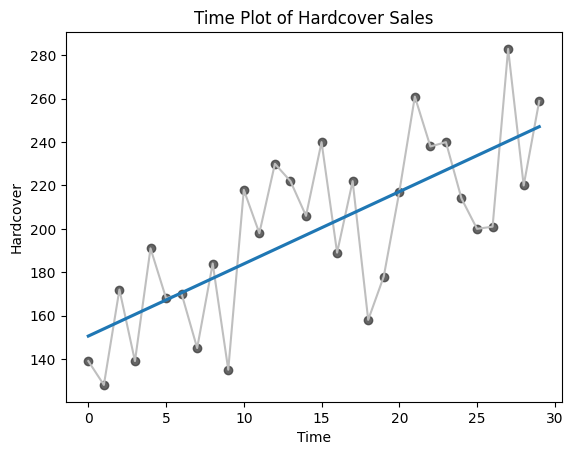

In [2]:
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

# 1) Интерпретируйте линейную регрессию с временной фиктивной переменной

Уравнение линии линейной регрессии (приблизительно): `Hardcover = 3.33 * Time + 150.5`. Как вы ожидаете, насколько в среднем изменятся продажи в твердом переплете за 6 дней? После того как подумаете, запустите следующую ячейку.


In [ ]:
# Uncomment the next line for a hint
#q_1.hint()

-------------------------------------------------------------------------------

Интерпретация регрессионных коэффициентов помогает распознавать серийную зависимость на временном графике. Рассмотрим модель `target = weight * lag_1 + error`, где `error` — случайный шум, а `weight` — число от -1 до 1. В этом случае `weight` показывает, насколько вероятно, что следующий временной шаг будет иметь тот же знак, что и предыдущий: `weight`, близкий к 1, означает, что `target` скорее всего будет иметь тот же знак, что и предыдущий шаг, а `weight`, близкий к -1, означает, что `target` скорее всего будет иметь противоположный знак.

# 2) Интерпретируйте линейную регрессию с лаговым признаком

Запустите следующую ячейку, чтобы увидеть два ряда, сгенерированные по только что описанной модели.


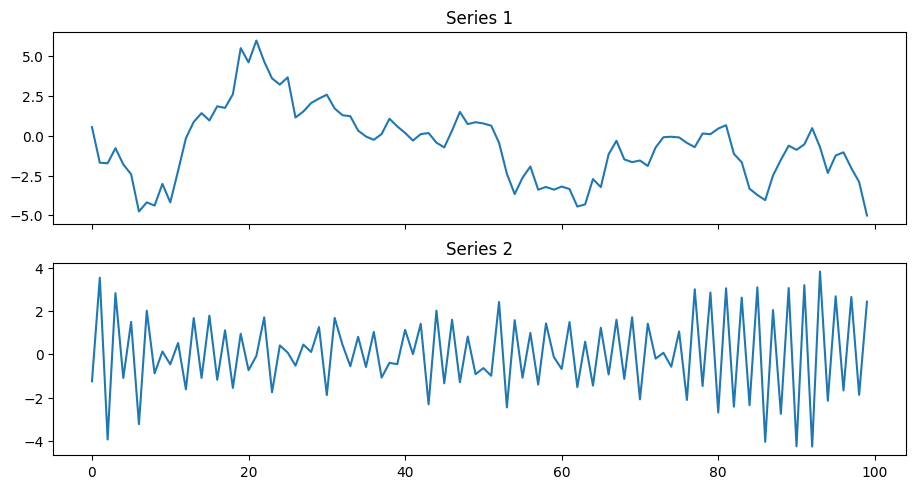

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)
ax1.plot(ar['ar1'])
ax1.set_title('Series 1')
ax2.plot(ar['ar2'])
ax2.set_title('Series 2');

Один из этих рядов имеет уравнение `target = 0.95 * lag_1 + error`, а другой — `target = -0.95 * lag_1 + error`, различаясь только знаком при лаговом признаке. Сможете определить, какое уравнение соответствует каждому ряду?


In [ ]:
# Uncomment the next line for a hint
#q_2.hint()

-------------------------------------------------------------------------------

Теперь мы начнем работать с данными соревнования *Store Sales - Time Series Forecasting*. Весь набор данных включает почти 1800 рядов, фиксирующих продажи магазинов по множеству товарных семей с 2013 по 2017 год. Для этого урока мы будем работать только с одним рядом (`average_sales`) — средними продажами за каждый день.

# 3) Подберите признак временного шага

Завершите код ниже, чтобы создать модель линейной регрессии с признаком временного шага для ряда средних продаж товаров. Целевая переменная находится в столбце `'sales'`.


In [4]:
from sklearn.linear_model import LinearRegression

df = average_sales.to_frame()

# YOUR CODE HERE: Create a time dummy
time = np.arange(len(df.index))

df['time'] = time 

# YOUR CODE HERE: Create training data
X = df[['time']]  # features
y = df['sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

Запустите эту ячейку, если хотите увидеть график результата.


-------------------------------------------------------------------------------

# 4) Подберите лаговый признак для Store Sales

Завершите код ниже, чтобы создать модель линейной регрессии с лаговым признаком для ряда средних продаж товаров. Целевая переменная находится в столбце `df` под именем `'sales'`.


In [6]:
df = average_sales.to_frame()

# YOUR CODE HERE: Create a lag feature from the target 'sales'
lag_1 = df['sales'].shift(1)

df['lag_1'] = lag_1  # add to dataframe

X = df.loc[:, ['lag_1']].dropna()  # features
y = df.loc[:, 'sales']  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

# YOUR CODE HERE: Create a LinearRegression instance and fit it to X and y.
model = LinearRegression().fit(X, y)

# YOUR CODE HERE: Create Store the fitted values as a time series with
# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)


# Check your answer

Запустите следующую ячейку, если хотите увидеть результат.


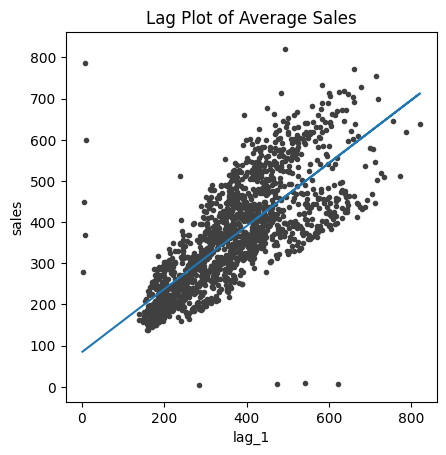

In [7]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');

# Продолжайте #

[**Моделируйте тренд**](https://www.kaggle.com/ryanholbrook/trend) во временных рядах с помощью скользящих средних и временной фиктивной переменной.


---



*Есть вопросы или комментарии? Посетите [форум обсуждения курса](https://www.kaggle.com/learn/time-series/discussion), чтобы пообщаться с другими учащимися.*
